In [1]:
import pickle
import glob
import os
import pandas
import numpy as np
import json

pandas.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
import Orange
import seaborn as sns

import baycomp
import matplotlib

sns.set_style("whitegrid")

In [2]:
with open('./datasets.json', 'r') as f:
    datasets = json.load(f)

### Load baseline results

In [3]:
# results from the respective publications
baseline_methods = ['SMTS','LPS','mvARF','DTW','ARKernel','gRSF','MLSTMFCN','MUSE']
baseline_results_arr = [[0.964,0.971,0.952,0.908,0.988,0.975,0.990,0.992],
[0.947,0.754,0.934,0.727,0.918,0.955,0.950,0.970],
[0.992,0.965,0.928,0.948,0.900,0.994,0.990,0.937],
[0.997,1.000,1.000,0.930,1.000,1.000,1.000,1.000],
[1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000],
[0.818,0.820,0.785,0.790,0.820,0.880,0.870,0.880],
[0.969,0.951,0.959,0.962,0.984,0.800,1.000,0.976],
[0.820,0.900,0.976,0.600,0.927,1.000,0.900,1.000],
[0.909,0.903,0.945,0.888,0.952,0.911,0.970,0.894],
[0.977,0.968, float('nan'),0.976,float('nan'),0.914,0.950,0.961],
[0.896,0.844,float('nan'), 0.832,0.750,1.000,float('nan'),float('nan')],
[0.917,0.908,0.923,0.927,0.952,0.932,0.970,0.912],
[1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000],
[0.941,0.980,0.952,0.916,0.904,0.929,0.970,0.916],
[0.965,0.962,0.931,0.974,0.968,0.992,0.990,0.997],
[1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000]]
baseline_results_arr = np.asarray(baseline_results_arr, dtype=np.float64)
baseline_results = {}
for i, method in enumerate(baseline_methods):
    baseline_results[method] = baseline_results_arr[:, i]

### Parse deep learning baselines

In [4]:
# baselines we ran

dl_baselines = ['FCN', 'ResNet']
num_experiments = 4

dl_baseline_results_dict = {m : {} for m in dl_baselines}
for k, model in enumerate(dl_baselines):
    base_model = model.split('_')[0]
    args_model = model.split('_')[1] if len(model.split('_')) > 1 else '' 
    results_folder = './results/{}/'.format(base_model)
    for i, dataset in enumerate(datasets):
        print('Parsing results for model: {} ({}/{}), dataset: {} ({:2d}/{})...'.format(model, k+1, len(dl_baseline_results_dict), dataset, i+1, len(datasets)))
        for j in range(num_experiments):
            experiment_name = '{}_{}_{}'.format(dataset, args_model) if args_model != '' else '{}_{}'.format(dataset, j)
            file_path = os.path.join(results_folder, experiment_name + '.pkl')
            if os.path.exists(file_path):
                with open(file_path, 'rb') as f:
                    saved_dict = pickle.load(f)
                test_acc = saved_dict['results']['test_acc']
            else:
                print('Warning: missing result file {}'.format(file_path))
                test_acc = float('nan')
                
            if j not in dl_baseline_results_dict[model]:
                dl_baseline_results_dict[model][j] = []
            dl_baseline_results_dict[model][j].append(test_acc)

Parsing results for model: FCN (1/2), dataset: ArabicDigits ( 1/16)...
Parsing results for model: FCN (1/2), dataset: AUSLAN ( 2/16)...
Parsing results for model: FCN (1/2), dataset: CharacterTrajectories ( 3/16)...
Parsing results for model: FCN (1/2), dataset: CMUsubject16 ( 4/16)...
Parsing results for model: FCN (1/2), dataset: DigitShapes ( 5/16)...
Parsing results for model: FCN (1/2), dataset: ECG ( 6/16)...
Parsing results for model: FCN (1/2), dataset: JapaneseVowels ( 7/16)...
Parsing results for model: FCN (1/2), dataset: KickvsPunch ( 8/16)...
Parsing results for model: FCN (1/2), dataset: LIBRAS ( 9/16)...
Parsing results for model: FCN (1/2), dataset: NetFlow (10/16)...
Parsing results for model: FCN (1/2), dataset: PEMS (11/16)...
Parsing results for model: FCN (1/2), dataset: PenDigits (12/16)...
Parsing results for model: FCN (1/2), dataset: Shapes (13/16)...
Parsing results for model: FCN (1/2), dataset: UWave (14/16)...
Parsing results for model: FCN (1/2), dataset: 

In [5]:
dl_baseline_results_mean = {m : [np.nanmean([dl_baseline_results_dict[m][i][j] for i in range(num_experiments)]) for j, d in enumerate(datasets)] for m in dl_baselines}
dl_baseline_results_std = {m : [np.nanstd([dl_baseline_results_dict[m][i][j] for i in range(num_experiments)]) for j, d in enumerate(datasets)] for m in dl_baselines}


dl_baseline_results_str = {m : ['{:.3f} ± {:.3f}'.format(dl_baseline_results_mean[m][i], dl_baseline_results_std[m][i]) for i in range(len(datasets))] for m in dl_baselines}

dl_baseline_results_mean_mean = {m : np.nanmean(dl_baseline_results_mean[m]) for m in dl_baselines}

In [6]:
pandas.DataFrame.from_dict(dl_baseline_results_str)

,FCN,ResNet
0,0.996 ± 0.001,0.997 ± 0.000
1,0.976 ± 0.004,0.977 ± 0.002
2,0.991 ± 0.001,0.990 ± 0.002
3,1.000 ± 0.000,1.000 ± 0.000
4,1.000 ± 0.000,1.000 ± 0.000
5,0.850 ± 0.025,0.853 ± 0.011
6,0.986 ± 0.003,0.989 ± 0.004
7,0.975 ± 0.043,0.725 ± 0.277
8,0.965 ± 0.005,0.965 ± 0.007
9,0.958 ± 0.005,0.876 ± 0.038


In [7]:
baseline_results = {**baseline_results, **dl_baseline_results_mean}

### Parse benchmark results

In [8]:
models =  ['LS2TR', 'ConvLS2TR']
num_experiments = 4

conv_hidden = 64
lrs_hidden = 64
num_levels = 2
order = 1

results_dict = {}
for padding in ['zeropad']:
    for k, model in enumerate(models):
        base_model = model.split('_')[0]
        args_model = model.split('_')[1] if len(model.split('_')) > 1 else '' 
        results_folder = './results/{}/'.format(base_model)
        for i, dataset in enumerate(datasets):
            print('Parsing results for model: {} ({}/{}), dataset: {} ({:2d}/{})...'.format(model, k+1, len(models), dataset, i+1, len(datasets)))
            for j in range(num_experiments):
                experiment_name = '{}_{}_H{}_N{}_M2_D3_{}'.format(dataset, args_model, conv_hidden, lrs_hidden, j) if args_model != '' else '{}_H{}_N{}_M2_D3_{}'.format(dataset, conv_hidden, lrs_hidden, j)
                file_path = os.path.join(results_folder, experiment_name + '.pkl')
                if os.path.exists(file_path):
                    with open(file_path, 'rb') as f:
                        saved_dict = pickle.load(f)
                    test_acc = saved_dict['results']['test_acc']
                else:
                    print('Warning: missing result file {}'.format(file_path))
                    test_acc = float('nan')
                if model not in results_dict:
                    results_dict[model] = {}
                if j not in results_dict[model]:
                    results_dict[model][j] = []
                results_dict[model][j].append(test_acc)

Parsing results for model: LS2TR (1/2), dataset: ArabicDigits ( 1/16)...
Parsing results for model: LS2TR (1/2), dataset: AUSLAN ( 2/16)...
Parsing results for model: LS2TR (1/2), dataset: CharacterTrajectories ( 3/16)...
Parsing results for model: LS2TR (1/2), dataset: CMUsubject16 ( 4/16)...
Parsing results for model: LS2TR (1/2), dataset: DigitShapes ( 5/16)...
Parsing results for model: LS2TR (1/2), dataset: ECG ( 6/16)...
Parsing results for model: LS2TR (1/2), dataset: JapaneseVowels ( 7/16)...
Parsing results for model: LS2TR (1/2), dataset: KickvsPunch ( 8/16)...
Parsing results for model: LS2TR (1/2), dataset: LIBRAS ( 9/16)...
Parsing results for model: LS2TR (1/2), dataset: NetFlow (10/16)...
Parsing results for model: LS2TR (1/2), dataset: PEMS (11/16)...
Parsing results for model: LS2TR (1/2), dataset: PenDigits (12/16)...
Parsing results for model: LS2TR (1/2), dataset: Shapes (13/16)...
Parsing results for model: LS2TR (1/2), dataset: UWave (14/16)...
Parsing results for

### Aggregate across runs

In [9]:
models = list(results_dict.keys())
results_mean = {m : [np.nanmean([results_dict[m][i][j] for i in range(num_experiments)]) for j, d in enumerate(datasets)] for m in models}
results_std = {m : [np.nanstd([results_dict[m][i][j] for i in range(num_experiments)]) for j, d in enumerate(datasets)] for m in models}
results_str = {m : ['{:.3f} ± {:.3f}'.format(results_mean[m][i], results_std[m][i]) for i in range(len(datasets))] for m in models}

results_mean_mean = {m : np.nanmean(results_mean[m]) for m in models}

In [10]:
pandas.DataFrame.from_dict(results_str)

,LS2TR,ConvLS2TR
0,0.968 ± 0.002,0.993 ± 0.001
1,0.969 ± 0.004,0.993 ± 0.001
2,0.957 ± 0.005,0.993 ± 0.001
3,1.000 ± 0.000,1.000 ± 0.000
4,1.000 ± 0.000,1.000 ± 0.000
5,0.842 ± 0.004,0.857 ± 0.023
6,0.980 ± 0.001,0.980 ± 0.002
7,1.000 ± 0.000,1.000 ± 0.000
8,0.774 ± 0.019,0.957 ± 0.008
9,0.777 ± 0.147,0.961 ± 0.004


### Compare methods and baselines

In [11]:
all_models = models
all_results = {**results_mean}
all_results_mean = {m : np.nanmean(all_results[m]) for m in all_models}

idx_models = {i : name for i, name in enumerate(datasets)}

idx = {**idx_models}
idx[len(datasets)] = 'Avg.acc.'
idx[len(datasets)+1] = 'Med.acc.'
idx[len(datasets)+2] = 'Sd.acc.'
idx[len(datasets)+3] = 'Avg.rank'
idx[len(datasets)+4] = 'Med.rank'
idx[len(datasets)+5] = 'Sd.rank'

print('Accuracies:\n')
df = pandas.DataFrame.from_dict(all_results)

# best = df.max(axis=1)
# median = df.median(axis=1)
# upper = df.quantile(0.75, axis=1)
# mean = df.mean(axis=1)

# df = df.join(best.rename('Best'))
# df = df.join(median.rename('Median'))
# df = df.join(upper.rename('Upper'))
# df = df.join(mean.rename('Mean'))

best = df.index[np.argmax(df.values, axis=1)]

ranks = df.rank(axis=1, method='average', ascending=False)
avg_rank = ranks.mean(axis=0)
med_rank = ranks.median(axis=0)
sd_rank = ranks.std(axis=0)

all_results_array = df.values
df_avg = df.mean(axis=0)
df_median = df.median(axis=0)
df_sd = df.std(axis=0)
df = df.append(df_avg, ignore_index=True).append(df_median, ignore_index=True).append(df_sd, ignore_index=True).append(avg_rank, ignore_index=True).append(med_rank, ignore_index=True).append(sd_rank, ignore_index=True).rename(index=idx)
display(df)

Accuracies:



,LS2TR,ConvLS2TR
ArabicDigits,0.968,0.993
AUSLAN,0.969,0.993
CharacterTrajectories,0.957,0.993
CMUsubject16,1.000,1.000
DigitShapes,1.000,1.000
ECG,0.842,0.857
JapaneseVowels,0.980,0.980
KickvsPunch,1.000,1.000
LIBRAS,0.774,0.957
NetFlow,0.777,0.961


In [12]:
all_models = list(baseline_results.keys()) + models
all_results = {**baseline_results, **results_mean}
all_results_mean = {m : np.nanmean(all_results[m]) for m in all_models}

idx = {i : name for i, name in enumerate(datasets)}
idx[len(datasets)] = 'Avg.acc.'
idx[len(datasets)+1] = 'Med.acc.'
idx[len(datasets)+2] = 'Sd.acc.'
idx[len(datasets)+3] = 'Avg.rank'
idx[len(datasets)+4] = 'Med.rank'
idx[len(datasets)+5] = 'Sd.rank'

print('Accuracies:\n')
df = pandas.DataFrame.from_dict(all_results)

ranks = df.rank(axis=1, method='average', ascending=False)
avg_rank = ranks.mean(axis=0)
med_rank = ranks.median(axis=0)
sd_rank = ranks.std(axis=0)

# rename
old_models = all_models[:]

# all_models[-2] = 'SNLST'
# all_models[-2] = 'DenseSNSLR'
# all_models[-1] = 'FCN-SNLST'

col_idx = {old_models[i] : x for i, x in enumerate(all_models)}

all_results_array = df.values
df_avg = df.mean(axis=0)
df_median = df.median(axis=0)
df_sd = df.std(axis=0)
df = df.append(df_avg, ignore_index=True).append(df_median, ignore_index=True).append(df_sd, ignore_index=True).append(avg_rank, ignore_index=True).append(med_rank, ignore_index=True).append(sd_rank, ignore_index=True).rename(index=idx, columns=col_idx)
display(df)

Accuracies:



,SMTS,LPS,mvARF,DTW,ARKernel,gRSF,MLSTMFCN,MUSE,FCN,ResNet,LS2TR,ConvLS2TR
ArabicDigits,0.964,0.971,0.952,0.908,0.988,0.975,0.990,0.992,0.996,0.997,0.968,0.993
AUSLAN,0.947,0.754,0.934,0.727,0.918,0.955,0.950,0.970,0.976,0.977,0.969,0.993
CharacterTrajectories,0.992,0.965,0.928,0.948,0.900,0.994,0.990,0.937,0.991,0.990,0.957,0.993
CMUsubject16,0.997,1.000,1.000,0.930,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
DigitShapes,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
ECG,0.818,0.820,0.785,0.790,0.820,0.880,0.870,0.880,0.850,0.853,0.842,0.857
JapaneseVowels,0.969,0.951,0.959,0.962,0.984,0.800,1.000,0.976,0.986,0.989,0.980,0.980
KickvsPunch,0.820,0.900,0.976,0.600,0.927,1.000,0.900,1.000,0.975,0.725,1.000,1.000
LIBRAS,0.909,0.903,0.945,0.888,0.952,0.911,0.970,0.894,0.965,0.965,0.774,0.957
NetFlow,0.977,0.968,nan,0.976,nan,0.914,0.950,0.961,0.958,0.876,0.777,0.961


#### Ranks of methods and baselines

In [13]:
idx = {i : name for i, name in enumerate(datasets)}
idx[len(datasets)] = 'Mean Rank'
idx[len(datasets)+1] = 'Median Rank'

print('Accuracies:\n')
df = pandas.DataFrame.from_dict(all_results).rank(axis=1, ascending=False, method='average').rename(columns=col_idx)
mean_ranks = df.mean(axis=0)
median_ranks = df.median(axis=0)
df = df.append(mean_ranks, ignore_index=True).append(median_ranks, ignore_index=True).rename(index=idx)
display(df)

Accuracies:



,SMTS,LPS,mvARF,DTW,ARKernel,gRSF,MLSTMFCN,MUSE,FCN,ResNet,LS2TR,ConvLS2TR
ArabicDigits,10.000,8.000,11.000,12.000,6.000,7.000,5.000,4.000,2.000,1.000,9.000,3.000
AUSLAN,8.000,11.000,9.000,12.000,10.000,6.000,7.000,4.000,3.000,2.000,5.000,1.000
CharacterTrajectories,3.000,7.000,11.000,9.000,12.000,1.000,6.000,10.000,4.000,5.000,8.000,2.000
CMUsubject16,11.000,5.500,5.500,12.000,5.500,5.500,5.500,5.500,5.500,5.500,5.500,5.500
DigitShapes,6.500,6.500,6.500,6.500,6.500,6.500,6.500,6.500,6.500,6.500,6.500,6.500
ECG,10.000,8.500,12.000,11.000,8.500,1.500,3.000,1.500,6.000,5.000,7.000,4.000
JapaneseVowels,8.000,11.000,10.000,9.000,4.000,12.000,1.000,7.000,3.000,2.000,5.500,5.500
KickvsPunch,10.000,8.500,5.000,12.000,7.000,2.500,8.500,2.500,6.000,11.000,2.500,2.500
LIBRAS,8.000,9.000,6.000,11.000,5.000,7.000,1.000,10.000,2.500,2.500,12.000,4.000
NetFlow,1.000,3.000,nan,2.000,nan,8.000,7.000,4.000,6.000,9.000,10.000,5.000


In [15]:
names = models
names[-2] = 'LS2T$^3$'
names[-1] = 'FCN-LS2T$^3$'
all_models[-2] = 'LS2T'
all_models[-1] = 'FCN-LS2T'

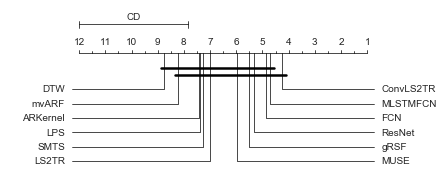

In [16]:
names = mean_ranks.index.values
mean_ranks.values
cd = Orange.evaluation.compute_CD(mean_ranks, 16, alpha='0.05', test='nemenyi')
Orange.evaluation.graph_ranks(mean_ranks, names, cd=cd, width=6, textspace=1, reverse=True, filename='cd_diagram.pdf')

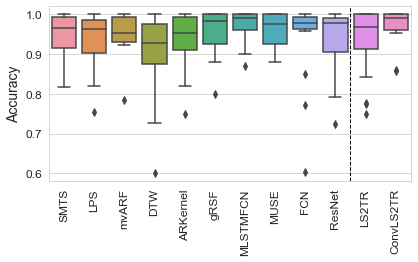

In [17]:
fig = plt.figure(figsize=(6, 3.75))
sns.boxplot(data=all_results_array)
plt.xticks(plt.xticks()[0], names, rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=9.485, color='black', linestyle='--', linewidth=1)
plt.ylabel('Accuracy', fontsize=14)
fig.patch.set_facecolor('white')
fig.tight_layout()
# fig.
plt.savefig('acc_boxplot.pdf', facecolor='white')

/scratch/toth/havok_env2/lib/python3.7/site-packages/baycomp/multiple.py:304: RuntimeWarning: invalid value encountered in greater
  return (a > thresh).astype(float) + 0.5 * (a == thresh).astype(float)
/scratch/toth/havok_env2/lib/python3.7/site-packages/baycomp/multiple.py:86: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


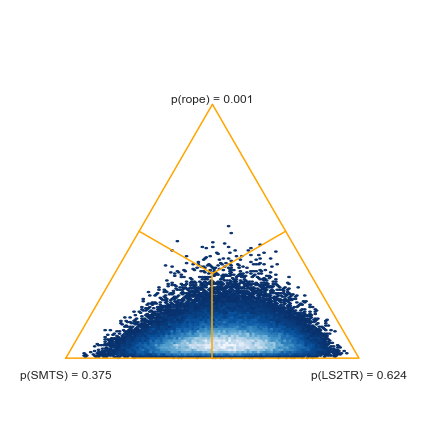

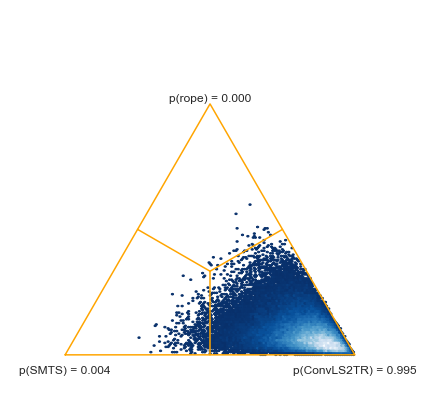

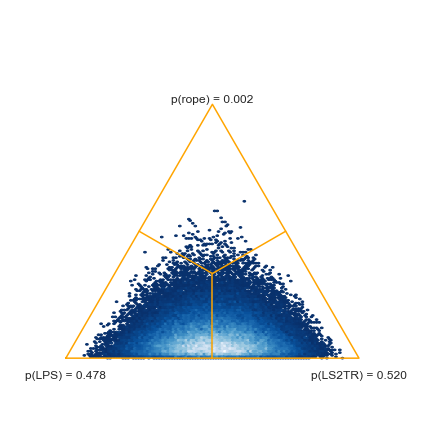

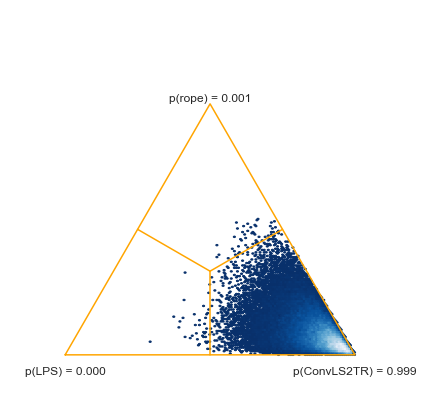

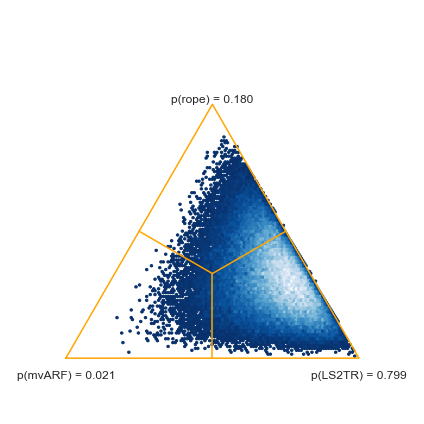

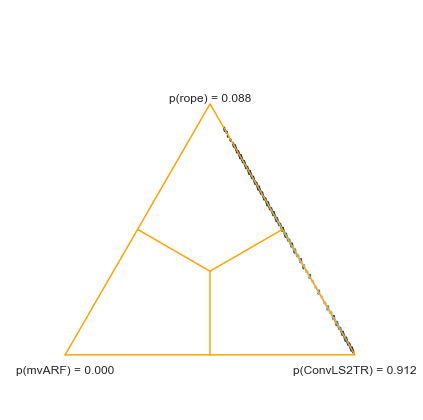

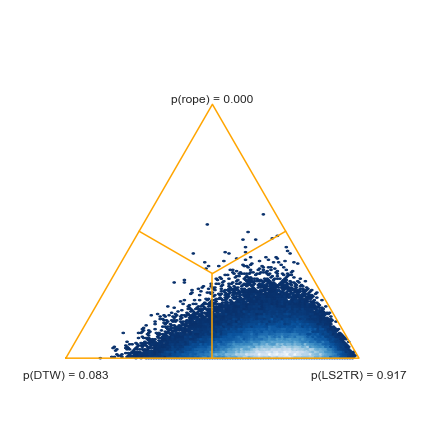

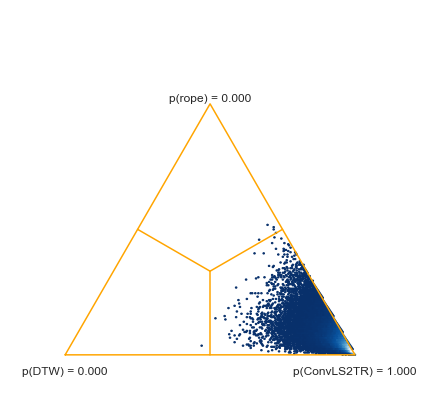

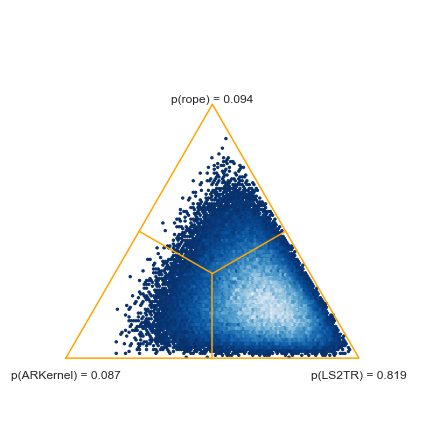

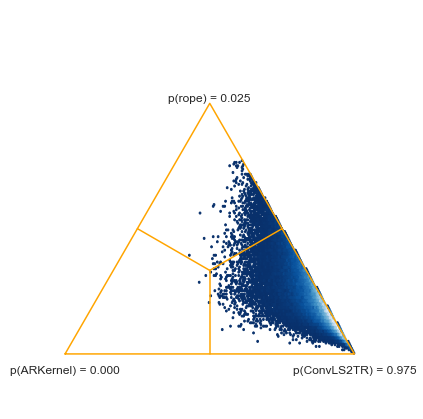

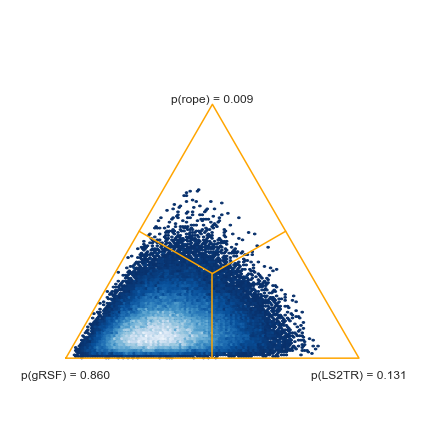

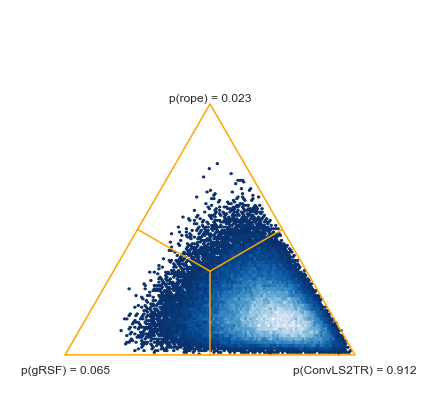

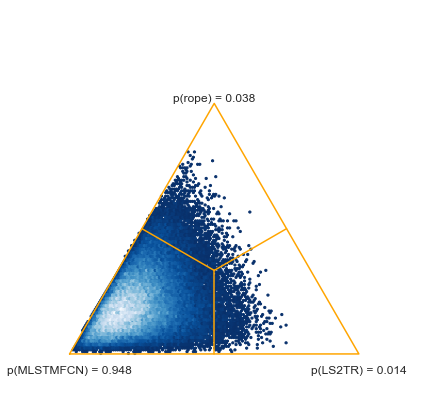

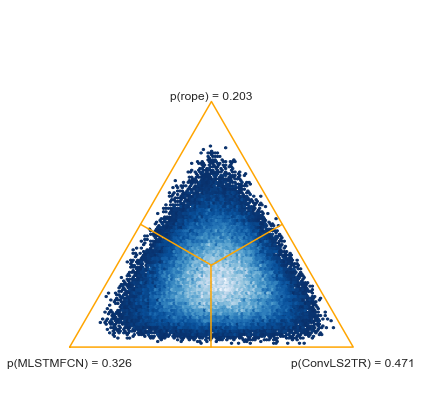

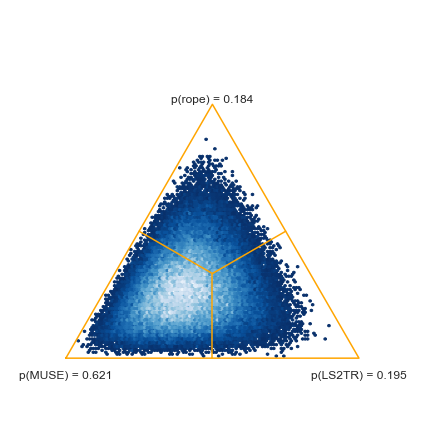

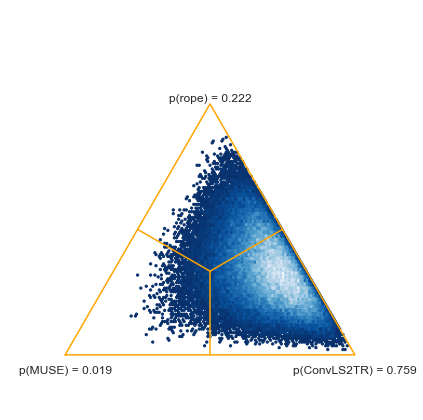

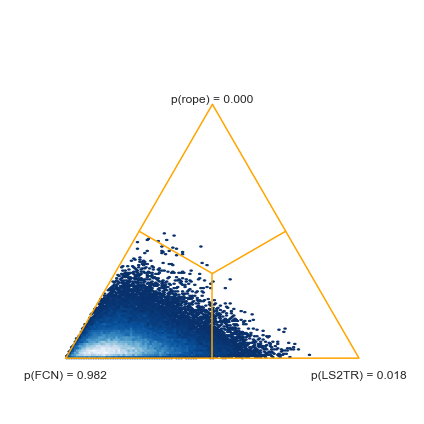

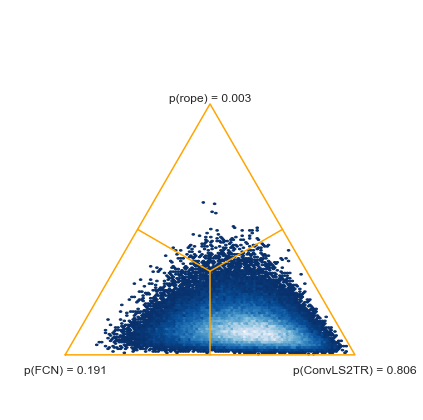

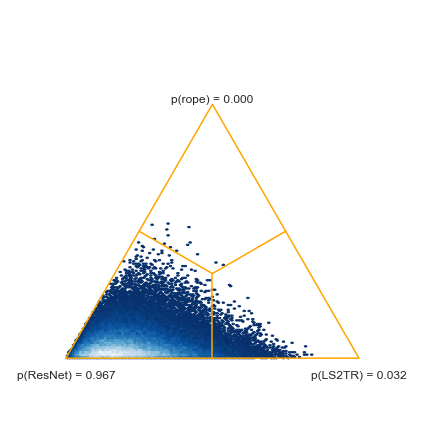

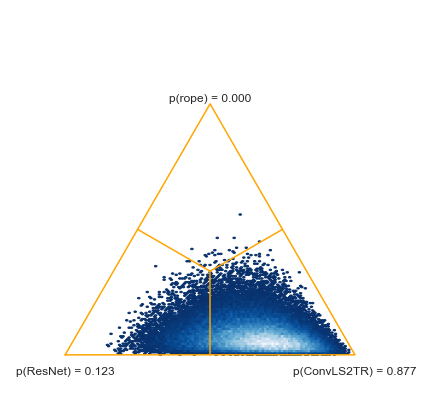

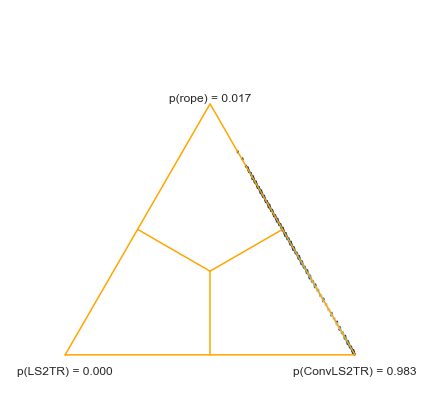

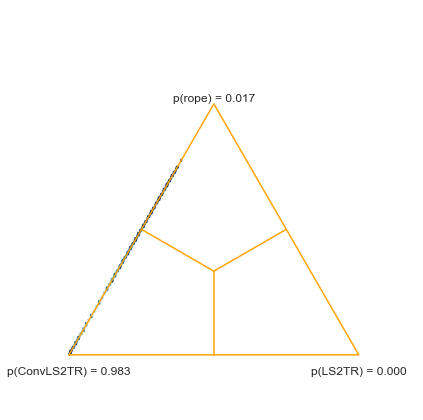

In [18]:
tests_folder = './bayes_tests/'
if not os.path.isdir(tests_folder):
    os.mkdir(tests_folder)
num_methods = all_results_array.shape[1]
probs_array = np.empty((num_methods, 6), dtype=float)
for i in range(num_methods):
    for j in range(2):
        if num_methods-2+j == i:
            continue
        test = baycomp.SignedRankTest(all_results_array[:, i], all_results_array[:, num_methods-2+j], rope=1e-3, nsamples=100000)
        probs = test.probs()
        probs_array[i, 3*j:3*(j+1)] = probs
        fig = test.plot(names=(names[i], names[num_methods-2+j]))
        fig.set_size_inches(6.0, 6.0)
        fig.patch.set_facecolor('white')
        fig.tight_layout()
        plt.tight_layout()
        fig_file = os.path.join(tests_folder, '{}_{}.png'.format(all_models[num_methods-2+j], all_models[i]))
        plt.savefig(fig_file, facecolor='white')

In [19]:
pandas.DataFrame(probs_array).rename(index={i:x for i, x in enumerate(list(all_results.keys())) if i < num_methods-2})

,0,1,2,3,4,5
SMTS,0.375,0.001,0.624,0.004,0.000,0.995
LPS,0.478,0.002,0.520,0.000,0.001,0.999
mvARF,0.021,0.180,0.799,0.000,0.088,0.912
DTW,0.083,0.000,0.917,0.000,0.000,1.000
ARKernel,0.087,0.094,0.819,0.000,0.025,0.975
gRSF,0.860,0.009,0.131,0.065,0.023,0.912
MLSTMFCN,0.948,0.038,0.014,0.326,0.203,0.471
MUSE,0.621,0.184,0.195,0.019,0.222,0.759
FCN,0.982,0.000,0.018,0.191,0.003,0.806
ResNet,0.967,0.000,0.032,0.123,0.000,0.877
